#Predicting Cyberbullying (Infosys Springboard Project)

##Sneha Goel

###Dataset: Cyberbullying Tweets

##Loading the Data

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/cyberbullying_tweets(1).csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/cyberbullying_tweets(1).csv'

##Data Exploration

In [ ]:
df.shape

(47692, 2)

In [ ]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


##Data Preprocessing

In [ ]:
!pip install demoji --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import demoji

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
demoji.download_codes()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-39-460b13fed6ee>:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


Lemmatization (Better)

In [ ]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update([
    'rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y',
    've', 'u', 'ur', 'don', 'p', 't', 's', 'aren', 'kp',
    'o', 'kat', 'de', 're', 'amp', 'will', 'wa', 'e', 'like'
])

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text_2(text):
    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)

    # Remove excess whitespace
    text = " ".join(text.split())

    # Convert text to lowercase
    text = text.lower()

    # Apply lemmatization to the words
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in STOPWORDS])

    # Handle emojis
    emoji_dict = demoji.findall(text)
    for emoticon, description in emoji_dict.items():
        text = text.replace(emoticon, "_".join(description.split()))

    return text

In [ ]:
df_2 = df.copy()

In [ ]:
df_2['cleaned_text'] = df_2['tweet_text'].apply(lambda text: clean_text_2(text))

In [ ]:
df_2.head()

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,gio meh thanks head concerned another angry du...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account islam lies


In [ ]:
# Checking for missing values
df_2.isnull().sum()

,0
tweet_text,0
cyberbullying_type,0
cleaned_text,0


In [ ]:
# Checking the presence of duplicated records
print(f"Number of duplicate values: {df_2.duplicated().sum()}")

Number of duplicate values: 36


In [ ]:
# Dropping duplicate records
cleaned_df = df_2.drop_duplicates()
cleaned_df.shape

(47656, 3)

In [ ]:
cleaned_df = cleaned_df[cleaned_df["cyberbullying_type"]!="other_cyberbullying"]

=> Removed 'other_cyberbullying' as it may lead to ambiguity

In [ ]:
cleaned_df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7997
age,7992
ethnicity,7959
gender,7948
not_cyberbullying,7937


In [ ]:
cyberbully_data = cleaned_df.copy()

In [ ]:
cyberbully_data.to_csv("cyberbully_data.csv", index=False)

##Performing EDA

In [ ]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
unique_types = cyberbully_data.cyberbullying_type.unique()
pastel_colors = px.colors.qualitative.Pastel[:len(unique_types)]

color_map = {cyber_type: pastel_colors[i] for i, cyber_type in enumerate(unique_types)}

Counting the instances of each cyberbullying type

In [ ]:
pastel_color = sns.color_palette("pastel", n_colors=len(unique_types))

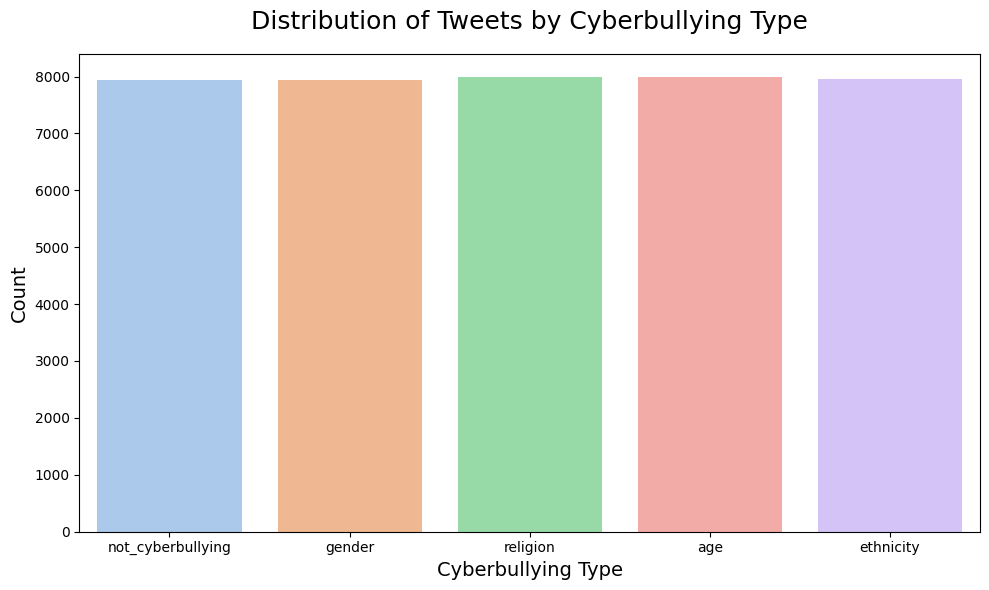

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cyberbully_data, x='cyberbullying_type', hue='cyberbullying_type', palette=pastel_color)
plt.title('Distribution of Tweets by Cyberbullying Type', fontsize=18, pad=18)

plt.xlabel('Cyberbullying Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

=> The no. of instances for each cyberbullying type is almost equal.

####This is a balanced dataset.

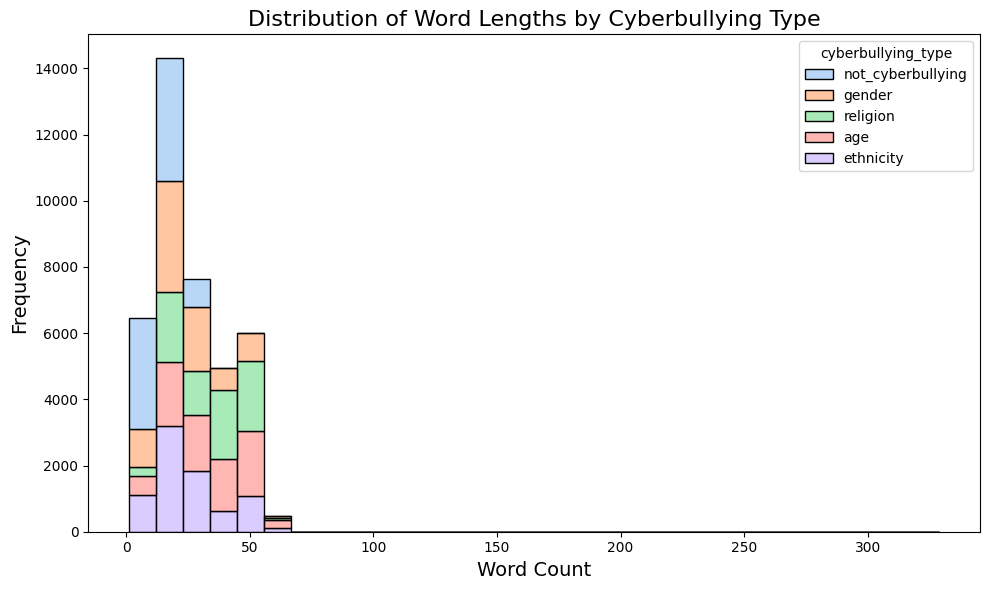

In [ ]:
# Calculate word lengths for each tweet
cyberbully_data['word_count'] = cyberbully_data['tweet_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=cyberbully_data, x='word_count', hue='cyberbullying_type', multiple='stack', palette='pastel', bins=30)
plt.title('Distribution of Word Lengths by Cyberbullying Type', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

=> How tweet lengths vary across different types of cyberbullying

=> Helps identify which cyberbullying types tend to have shorter or longer tweets

In [ ]:
from wordcloud import WordCloud

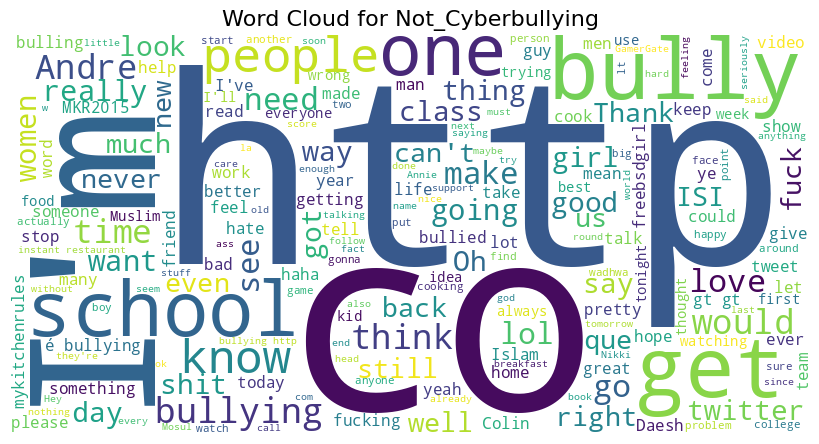

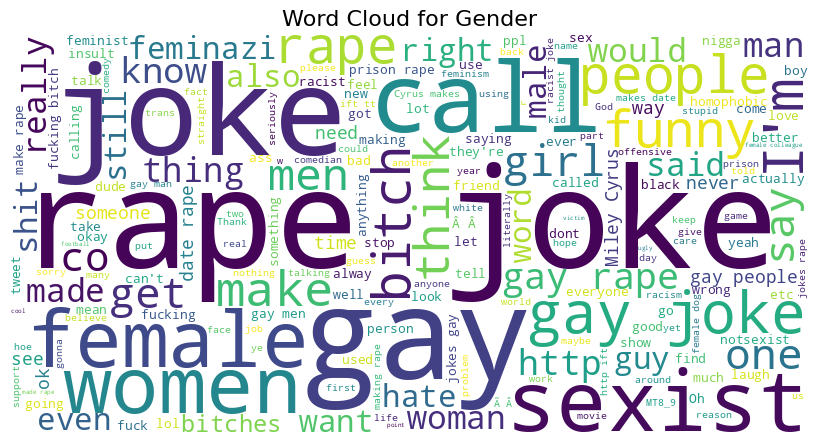

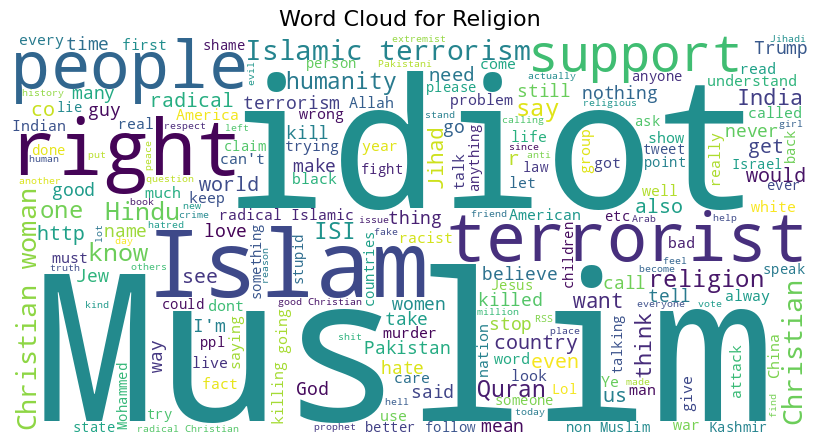

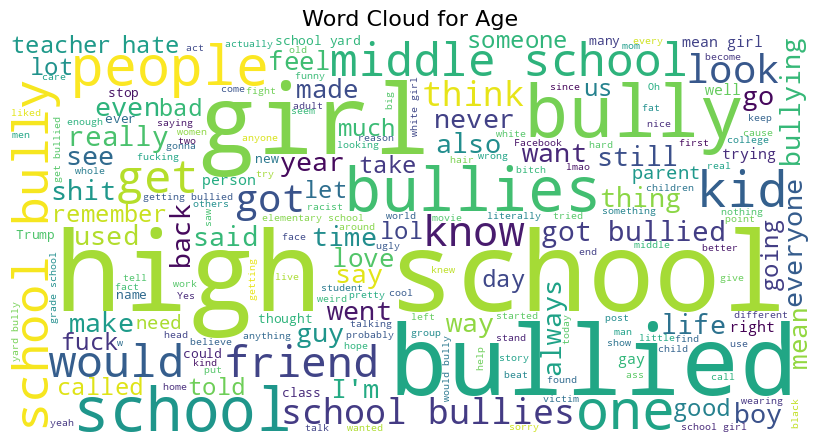

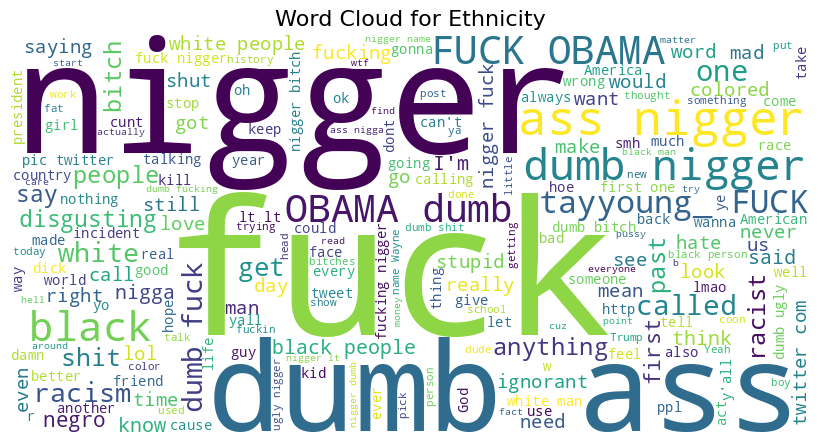

In [ ]:
# Create word clouds for each cyberbullying type
cyberbullying_types = cyberbully_data['cyberbullying_type'].unique()

for cyber_type in cyberbullying_types:
    plt.figure(figsize=(8, 8))
    subset = cyberbully_data[cyberbully_data['cyberbullying_type'] == cyber_type]
    text = " ".join(subset['tweet_text'].values)

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {cyber_type.title()}", fontsize=16)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Top 20 words for each cyberbullying type

In [ ]:
for cyber_type in unique_types:

    # Get the top 20 words for the current cyberbullying type
    top20_word = cyberbully_data.cleaned_text[cyberbully_data.cyberbullying_type == cyber_type].str.split(expand=True).stack().value_counts()[:20]

    # Create a bar plot using the mapped color for the current cyber_type
    fig = px.bar(top20_word,
                 color=top20_word.index,  # Use the words as color categories
                 color_discrete_sequence=[color_map[cyber_type]],  # Use the color mapped to the current type
                 custom_data=[top20_word.values])

    # Update traces and layout
    fig.update_traces(marker_color=color_map[cyber_type])  # Set the marker color
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 20 words for {cyber_type}",
                      template='simple_white',
                      hovermode='x unified',
                      showlegend=False)

    # Show the plot
    fig.show()

In [ ]:
# Combine all cleaned text into one series
all_words = cyberbully_data.cleaned_text.str.cat(sep=' ')

# Count word frequencies
top_words = pd.Series(all_words.split()).value_counts()[:20]

# Display the top 20 words
print("Top 20 common words across all cyberbullying types:")
top_words

Top 20 common words across all cyberbullying types:


,count
school,8935
fuck,5828
dumb,5298
girl,5122
high,5079
nigger,4781
bullied,4456
people,4395
bully,4295
joke,4193


##Data Preparation


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = cleaned_df['cleaned_text']
y = cleaned_df['cyberbullying_type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
y_train.head()

,cyberbullying_type
32746,age
6990,not_cyberbullying
43985,ethnicity
9543,gender
6889,not_cyberbullying


Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
X_train_tfidf

<35849x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 397308 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<3984x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 43690 stored elements in Compressed Sparse Row format>

##Model Training

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

####Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
                    precision    recall  f1-score   support

              age       0.96      0.98      0.97       798
        ethnicity       0.98      0.98      0.98       761
           gender       0.95      0.81      0.88       809
not_cyberbullying       0.79      0.88      0.83       836
         religion       0.95      0.95      0.95       780

         accuracy                           0.92      3984
        macro avg       0.93      0.92      0.92      3984
     weighted avg       0.92      0.92      0.92      3984



####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
                    precision    recall  f1-score   support

              age       0.99      0.98      0.98       798
        ethnicity       0.99      0.99      0.99       761
           gender       0.91      0.85      0.88       809
not_cyberbullying       0.82      0.86      0.84       836
         religion       0.94      0.96      0.95       780

         accuracy                           0.93      3984
        macro avg       0.93      0.93      0.93      3984
     weighted avg       0.93      0.93      0.93      3984



####Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

y_pred_gb = gb_model.predict(X_test_tfidf)

print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
                    precision    recall  f1-score   support

              age       0.98      0.98      0.98       798
        ethnicity       1.00      0.98      0.99       761
           gender       0.94      0.80      0.86       809
not_cyberbullying       0.77      0.92      0.84       836
         religion       0.96      0.93      0.94       780

         accuracy                           0.92      3984
        macro avg       0.93      0.92      0.92      3984
     weighted avg       0.93      0.92      0.92      3984



##Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('rf_model', RandomForestClassifier(n_estimators=128, random_state=42))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('rf_model',
                 RandomForestClassifier(n_estimators=128, random_state=42))])

In [ ]:
tweet = ["@abc Hey man! Great match today. Your smashes were spot on. Let's continue playing together. \
            #badminton #brotherhood #men #doubles"]

In [ ]:
tweet_1 = ["Why dont you just disappear? The world would be better without you."]

In [ ]:
y_pred = pipe.predict(tweet_1)
y_pred

array(['not_cyberbullying'], dtype=object)

In [ ]:
y_pred_rf = pipe.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy Score: {accuracy:.4f}")

Random Forest Accuracy Score: 0.9272


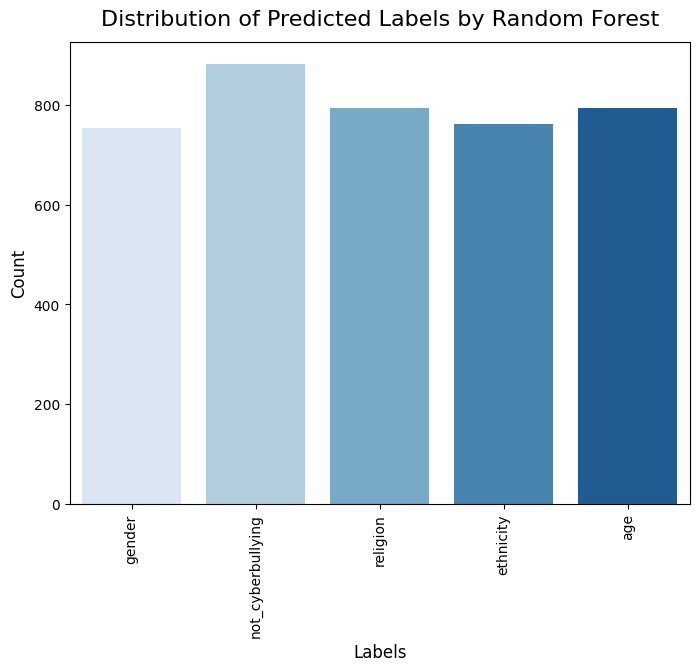

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=y_pred_rf, palette="Blues", hue=y_pred_rf, dodge=False, legend=False)
plt.title("Distribution of Predicted Labels by Random Forest", fontsize=16, pad=12)

plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=90)

plt.show()

###Word EMbeddings and LSTM

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pickle

In [ ]:
# Tokenizing and padding sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

In [ ]:
with open('/content/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(y_train.unique()), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform labels to convert them to integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

class_labels = label_encoder.classes_

# Print the encoding map
print("Encoding map:")
for index, label in enumerate(class_labels):
    print(f"{index}: {label}")

Encoding map:
0: age
1: ethnicity
2: gender
3: not_cyberbullying
4: religion


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

In [ ]:
model.save('Tweet_Sentiment_Prediction_Model.h5')

In [ ]:
model.save('Tweet_Sentiment_Prediction_Model.keras')

In [ ]:
def predict_tweet(tweet, tokenizer, model, max_length):
    # Preprocess the tweet: tokenize and pad to the same length
    tweet_seq = tokenizer.texts_to_sequences([tweet])
    tweet_pad = pad_sequences(tweet_seq, maxlen=max_length, padding='post', truncating='post')

    # Predict the class
    prediction = model.predict(tweet_pad)
    predicted_class = prediction.argmax(axis=-1)[0]  # Get the class with highest probability

    return predicted_class

In [ ]:
user_tweet = ["Why dont you just disappear? The world would be better without you."]

In [ ]:
predicted_class = predict_tweet(user_tweet, tokenizer, model, 50)
predicted_class_label = label_encoder.inverse_transform([predicted_class])
print(f"Predicted class for the input tweet: {predicted_class_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Predicted class for the input tweet: not_cyberbullying


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/Tweet_Sentiment_Prediction_Model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 



###Bidirectional  LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_bidirectional_lstm_model(vocab_size, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))

    # Add a Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(128, return_sequences=False)))
    model.add(Dropout(0.5))

    model.add(Dense(5, activation='softmax'))

    return model

In [ ]:
vocab_size = 10000
embedding_dim = 100
max_length = 50

In [ ]:
bi_lstm = create_bidirectional_lstm_model(vocab_size, embedding_dim, max_length)
bi_lstm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [ ]:
bi_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

Epoch 1/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 489s 436ms/step - accuracy: 0.9898 - loss: 0.0267 - val_accuracy: 0.8988 - val_loss: 0.6738
Epoch 2/5
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 504s 437ms/step - accuracy: 0.9890 - loss: 0.0275 - val_accuracy: 0.8993 - val_loss: 0.7139
Epoch 3/5
 859/1121 ━━━━━━━━━━━━━━━━━━━━ 1:52 428ms/step - accuracy: 0.9907 - loss: 0.0250

In [ ]:
def predict_tweet(user_tweet, tokenizer, model, max_length):
    tweet_sequence = tokenizer.texts_to_sequences([user_tweet])
    tweet_pad = pad_sequences(tweet_sequence, maxlen=max_length)

    predicted_class = model.predict(tweet_pad)
    predicted_class_label = label_encoder.inverse_transform([predicted_class.argmax()])

    return predicted_class_label[0]

In [ ]:
user_tweet = ["Why dont you just disappear? The world would be better without you."]

In [ ]:
predicted_class = predict_tweet(user_tweet, tokenizer, model, max_length)
print(f"Predicted class for the input tweet: {predicted_class}")

###BERT

In [ ]:
!pip install transformers torch --quiet

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import pipeline

In [ ]:
cyberbully_data = pd.read_csv("/content/cyberbully_data.csv")

In [ ]:
cyberbully_data.isnull().sum()

,0
tweet_text,0
cyberbullying_type,0
cleaned_text,0


In [ ]:
# Encode labels
label_encoder = LabelEncoder()

cyberbully_data['cyberbullying_type'] = label_encoder.fit_transform(cyberbully_data['cyberbullying_type'])
label_names = label_encoder.classes_

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    cyberbully_data['cleaned_text'].tolist(),
    cyberbully_data['cyberbullying_type'].tolist(),
    test_size=0.2,
    random_state=42
)

In [ ]:
train_texts = [str(text) for text in train_texts if text is not None]
val_texts = [str(text) for text in val_texts if text is not None]

In [ ]:
# Initialize tokenizer and BERT model for sequence classification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_names))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize the data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

In [ ]:
# Create a Dataset class
class CyberbullyingDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# Create train and validation datasets
train_dataset = CyberbullyingDataset(train_encodings, train_labels)
val_dataset = CyberbullyingDataset(val_encodings, val_labels)

In [ ]:
# Set up training arguments and trainer
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
# Fine-tune the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.255700,0.251751
2,0.190600,0.283349
3,0.117900,0.329107


TrainOutput(global_step=11952, training_loss=0.2274191864682648, metrics={'train_runtime': 3288.4922, 'train_samples_per_second': 29.07, 'train_steps_per_second': 3.634, 'total_flos': 6288392045818368.0, 'train_loss': 0.2274191864682648, 'epoch': 3.0})

####Performance Evaluation

In [ ]:
# VALIDATION ACCURACY:

eval_results = trainer.evaluate()
eval_results

{'eval_loss': 0.32910671830177307,
 'eval_runtime': 47.8249,
 'eval_samples_per_second': 166.587,
 'eval_steps_per_second': 20.826,
 'epoch': 3.0}

In [ ]:
from sklearn.metrics import classification_report

predictions = trainer.predict(val_dataset)
pred_labels = predictions.predictions.argmax(-1)
true_labels = predictions.label_ids

print(classification_report(true_labels, pred_labels, target_names=label_names))


                   precision    recall  f1-score   support

              age       0.98      0.98      0.98      1596
        ethnicity       0.99      0.98      0.99      1597
           gender       0.90      0.88      0.89      1577
not_cyberbullying       0.85      0.84      0.85      1630
         religion       0.95      0.97      0.96      1567

         accuracy                           0.93      7967
        macro avg       0.93      0.93      0.93      7967
     weighted avg       0.93      0.93      0.93      7967



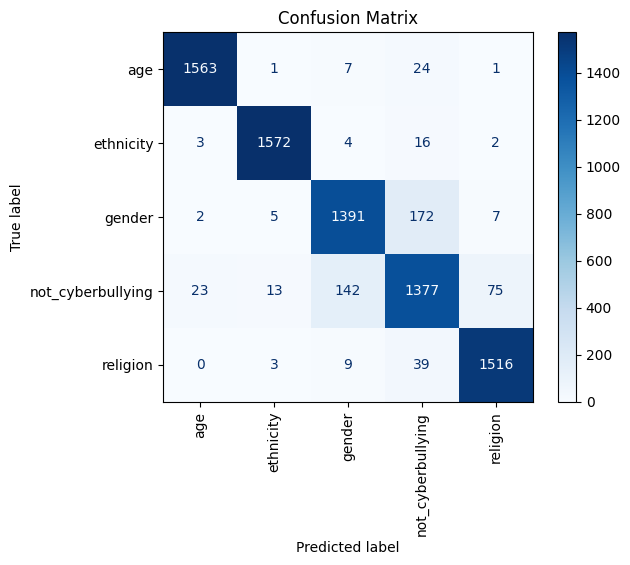

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_predictions(
    true_labels, pred_labels, display_labels=label_names, cmap="Blues"
)

plt.xticks(rotation=90)
plt.title("Confusion Matrix")
plt.show()

####Save the Trained Model

In [ ]:
# Save the fine-tuned model
model.save_pretrained("cyberbullying_bert_model")
tokenizer.save_pretrained("cyberbullying_bert_tokenizer")

('cyberbullying_bert_tokenizer/tokenizer_config.json',
 'cyberbullying_bert_tokenizer/special_tokens_map.json',
 'cyberbullying_bert_tokenizer/vocab.txt',
 'cyberbullying_bert_tokenizer/added_tokens.json')

In [ ]:
# Save model weights manually using PyTorch
torch.save(model.state_dict(), 'cyberbullying_bert_model/pytorch_model.bin')

####Predictions

In [ ]:
# Load the saved tokenizer and model
model_path = "cyberbullying_bert_model"
tokenizer_path = "cyberbullying_bert_tokenizer"

tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
model = BertForSequenceClassification.from_pretrained(model_path)

model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
def predict_class(text):
    # Tokenize
    encodings = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors="pt")

    # Perform inference
    with torch.no_grad():
        outputs = model(**encodings)
        prediction = torch.argmax(outputs.logits, dim=1).item()

    return label_names[prediction]

In [ ]:
print('------------------------------')
print('CYBERBULLY PREDICTION SYSTEM')
print('------------------------------\n')
print("\nEnter the tweet:")

while True:
    user_input = input("Input: ")
    if user_input.lower() == "exit":
        print("Exiting...")
        break
    predicted_class = predict_class(user_input)
    print(f"Predicted Class: {predicted_class}\n")

------------------------------
CYBERBULLY PREDICTION SYSTEM
------------------------------


Enter the tweet:
Input: wtf why are u acting like a high school bully
Predicted Class: age

Input: you're accent sounds sooo dumb, u nigga
Predicted Class: ethnicity

Input: you people are so backward with your beliefs
Predicted Class: religion

Input: you are a fag, you dont deserve to exist
Predicted Class: gender

Input: why is he so fair, is he a vampire?
Predicted Class: not_cyberbullying

Input: Exit
Exiting...
